In [216]:
import pandas as pd
import numpy as np
import re

sold_5070_5080 = pd.read_excel("5070-5088.xlsx")
sold_5070_5080
pd.set_option('display.max_rows', 50)

# Data preparation


- Only focus on the types **House**, **Land**, **Unit**, since those are most common type in the the sold-data
- Filter the **sale price** which only with valid value(numeric)
- Some values in **Land Size** are lesser than **Building Area** or equal to **zero**, change those values to **max(Land Size,Building Area)** and drop the rest rows with the invalid value in **Lanz Size**
- Create 2 addiontal columns: **price in /k dollars** and **price per square meter**

In [217]:
sub_cat = ["House","Land","Unit"]
subset_sold = sold_5070_5080[sold_5070_5080["Property Type/Category"].isin(sub_cat)]
subset_sold = sold_5070_5080[(sold_5070_5080["Sale Price"] != 0) & (sold_5070_5080["Sale Price"] != "Not Disclosed")]
#subset_sold.loc[subset_sold["Land Size"]==0,"Land Size"] = subset_sold["Building Area"]

subset_sold.loc[( subset_sold["Building Area"] > subset_sold["Land Size"]),"Land Size"] = subset_sold["Building Area"]
subset_sold = subset_sold[subset_sold["Land Size"]!=0]
subset_sold['Sale Price'] = subset_sold['Sale Price'].astype(float)
subset_sold['price_k'] = subset_sold['Sale Price']/1000
subset_sold["price_per_m^2"] = round(subset_sold['Sale Price']/subset_sold['Land Size'],2)
subset_sold.sort_values("price_per_m^2")


d:\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Street Address,Suburb,State,Postcode,Property Type/Category,Bed,Bath,Car,Land Size,Building Area,Sale Price,Sale Date,Settlement Date,Agency,Agent,Land Use 1,Zoning,Development Zone,price_k,price_per_m^2
254,426 Norton Summit Road,Teringie,SA,5072,House,0,0,0,16200.0,322.0,2000000.0,2023-03-20,2023-03-20,NaN,NaN,Rural Residential House (House Without Primary...,Hills Face,NaN,2000.0,123.46
790,56 Briens Road,Northfield,SA,5085,Business,0,0,0,667.0,110.0,82500.0,2023-04-06,2023-04-06,NaN,NaN,Professional Services N.E.C.,NaN,Residential,82.5,123.69
812,26A North Avenue,Northfield,SA,5085,House,3,2,0,340.0,170.0,120000.0,2023-02-28,2023-02-28,NaN,NaN,House,NaN,NaN,120.0,352.94
655,29 Ormond Avenue,Clearview,SA,5085,House,3,2,1,1604.0,204.0,600000.0,2023-04-26,2023-04-26,Boffo Real Estate,NaN,House,Residential (1)Nth Haven Sth Of Vict Rd,Residential,600.0,374.06
517,14 Frank Street,Newton,SA,5074,Land,0,0,0,1496.0,120.0,600000.0,2023-04-14,2023-04-14,Eclipse Real Estate,NaN,House,Residential,Residential,600.0,401.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,9 Highland Avenue,Rostrevor,SA,5073,House,4,2,2,121.0,121.0,820000.0,2023-03-17,2023-03-17,LJ Hooker Kensington | Unley,NaN,NaN,NaN,Residential,820.0,6776.86
345,42 Leabrook Drive,Rostrevor,SA,5073,House,4,1,2,121.0,121.0,850000.0,2023-04-06,2023-04-06,Harris Real Estate - Rla 226409,NaN,NaN,NaN,Residential,850.0,7024.79
168,8 Blanche Avenue,Magill,SA,5072,House,3,1,2,128.0,128.0,900000.0,2023-04-15,2023-04-15,Boffo Real Estate,NaN,NaN,NaN,Residential,900.0,7031.25
68,32 Alexander Lane,Marden,SA,5070,Land,0,0,0,78.0,0.0,569000.0,2023-02-22,2023-02-22,LJ Hooker Glynde,NaN,Vacant Land-Urban,NaN,NaN,569.0,7294.87


## Check the outliers in the **price_per_m^2** column

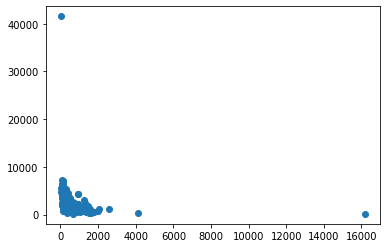

In [218]:
import matplotlib.pyplot as plt


plt.scatter(subset_sold["Land Size"],subset_sold["price_per_m^2"])
plt.show()


The figure shows the relationship between **price per m^2** and **Land Size** seems a $ f(x) = e^{-x} $

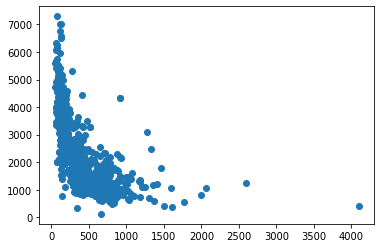

In [219]:
subset_sold = subset_sold[subset_sold["Land Size"] < 5000]
subset_sold = subset_sold[subset_sold["price_per_m^2"] < 10000]
plt.scatter(subset_sold["Land Size"],subset_sold["price_per_m^2"])
plt.show()


In [220]:
subset_sold.isna().sum()

Street Address              0
Suburb                      0
State                       0
Postcode                    0
Property Type/Category      0
Bed                         0
Bath                        0
Car                         0
Land Size                   0
Building Area               0
Sale Price                  0
Sale Date                   0
Settlement Date             0
Agency                    240
Agent                     501
Land Use 1                 60
Zoning                    816
Development Zone          335
price_k                     0
price_per_m^2               0
dtype: int64

## Correlation martix

- The figure shows that non-linear relationship or linear relationship insignificant among those variables and **price**(except the **Building Area**)
- Significant *postive* relationship bewteen **Bed** and **Bath**
- Significant *nevatie* relationship bewteen **price per m^2** and **Land Size**

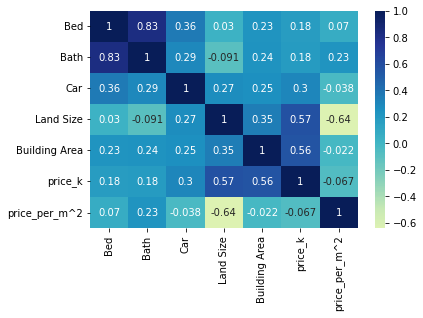

In [221]:
import matplotlib.pyplot as mp, seaborn
df_corr = subset_sold[["Bed","Bath","Car","Land Size","Building Area",'price_k',"price_per_m^2"]].corr()
seaborn.heatmap(df_corr, center=0, annot=True, cmap='YlGnBu')
mp.show()

In [237]:
def stat_price(groubyCol,statCol,round_up = 2,sort="median",ascending= False ,data = subset_sold):
    result = data.groupby(groubyCol)[statCol].agg({'count','min','mean','median','max','std','skew'}).round(round_up).sort_values(sort,ascending = ascending)
    result['std/mean'] = result['std']/result['mean']
    result = result[['count','min','mean','median','max','std/mean','skew']]
    return result

# EDA

Order the performance in **Zone-wise**

-----

We want to select properties in the zone which have **positive and higher skew**(more prone to sell higher price), relative **lower std/mean**(have a relative stable price interval), and **more liquidity(count)** as well. 

Note:
***std/mean*** makes the standard deviation comparable across the data

In [223]:
zone = stat_price("Postcode","price_per_m^2",sort="median")

zone_dict_mean = {}
for index in zone.index:
    zone_dict_mean[index] = zone.loc[index,"median"]
zone_dict_mean
zone # 

,count,min,mean,median,max,std/mean,skew
Postcode,,,,,,,
5070,121,717.03,2773.14,2473.96,7294.87,0.540831,0.94
5074,108,401.07,2472.61,2152.10,5584.88,0.534322,0.44
5085,187,123.69,2386.42,1994.30,5285.71,0.573989,0.29
5072,103,402.44,2210.92,1990.20,7031.25,0.537659,1.67
5073,96,606.42,2269.97,1909.97,7024.79,0.576915,1.43
5087,82,720.95,1800.12,1606.71,4959.46,0.516354,1.34
5086,120,702.43,1600.66,1589.48,4925.37,0.391076,1.46
5075,64,493.83,1623.75,1247.14,4789.92,0.580317,1.64
5088,42,739.25,1617.70,1198.42,3075.00,0.496285,0.50


Order the performance in Type-wise

----

- **Unit** have a highest mean, that match the negative relationship between **area** and **price per m^2**
- **House** have a highest liquidity
- **Land** have a highest **skew** which means the land or vacant land prone to sell much higher than the average price

In [235]:
subset_sold = subset_sold.drop(subset_sold[subset_sold["Property Type/Category"].isin(["Business", "Commercial","Other","Community"])].index)
property_type = stat_price("Property Type/Category","price_per_m^2",sort = ['count','skew'],data = subset_sold)

property_type_mean = {"House":1896.72,"Unit":3390.90,"Land":1309.17}
property_type


,count,min,mean,median,max,std/mean,skew
Property Type/Category,,,,,,,
House,631,352.94,1896.72,1664.28,7031.25,0.552765,1.55
Unit,201,565.72,3390.90,3375.00,6307.69,0.356613,0.11
Land,68,401.07,1309.17,1172.07,7294.87,0.632362,5.84


The performance of 3 **type** in each **zone** ,filter by the **skew** greater than **0**

In [238]:
zone_type = stat_price(["Postcode","Property Type/Category"],"price_per_m^2",sort=["skew"])
zone_type.reset_index(inplace=True)

zone_type.columns

higest_performance = {"Unit":[5070,5072],"House":[5074,5072,5085,5073,5070,5070,5086],"Land":[5072,5070,5074,5075]} # The dictionary contains the best performance zones of each type
zone_type[zone_type['skew'] > 0].sort_values(["median","skew"],ascending=False) # We want the properties have higher average price and have a positive skew, while the std/mean is relatively small.


,Postcode,Property Type/Category,count,min,mean,median,max,std/mean,skew
11,5070,Unit,49,1378.68,3908.45,3776.60,6307.69,0.309391,0.45
10,5072,Unit,18,2136.17,3427.37,2974.04,5416.67,0.310667,0.50
16,5075,Unit,10,1342.11,2925.14,2797.44,4789.92,0.458392,0.18
15,5086,Unit,17,1108.11,2189.43,2059.80,3179.35,0.245776,0.28
8,5074,House,70,758.12,2282.96,2014.87,5421.49,0.527210,0.66
2,5072,House,65,402.44,2091.72,1917.40,7031.25,0.552282,2.19
12,5085,House,131,352.94,2100.13,1841.04,4580.95,0.576260,0.45
3,5073,House,72,845.07,2078.08,1736.73,7024.79,0.599067,2.16
14,5088,House,31,739.25,1675.41,1706.04,3075.00,0.510496,0.31
1,5070,House,61,717.03,1986.91,1664.28,6500.00,0.507794,2.25


Combind on-sale data and sold-data data, and to find out the **difference of price per square meter** 


---


Trim and standize the levels/categories of **property type** in the on-sale data, only kept the type in **unit**, **land** and **house**

In [226]:
on_sale_5070_5080 = pd.read_csv("on_sale_5700_5088.csv")

on_sale_5070_5080.loc[(on_sale_5070_5080["property_type"] == "Apartment / Unit / Flat") | (on_sale_5070_5080["property_type"] == "Block of Units"),"property_type"] = "Unit"  
on_sale_5070_5080.loc[(on_sale_5070_5080["property_type"] == "Vacant land"),"property_type"] = "Land"  
on_sale_5070_5080.loc[(on_sale_5070_5080["property_type"] == "New House & Land") |(on_sale_5070_5080["property_type"] == "Townhouse"),"property_type"] = "House"
on_sale_5070_5080 = on_sale_5070_5080[on_sale_5070_5080["property_type"].isin(["Unit","Land","House"])]
on_sale_5070_5080

,Unnamed: 0,area,baths,beds,parking,date,price,property_type,agent_name,school_list,agent_low_price,village_name,number,clean_price,price_k,price_per_m^2
0,59,302.0,1.0,2.0,1.0,Organise an inspection,Price From Low $200k,Unit,Jun Chi,"[{""school_name"": ""Magill School"", ""school_dist...",150000,MAGILL,5072,200000.0,200.0,0.662252
1,117,280.0,1.0,2.0,1.0,Organise an inspection,"$245,000 - $255,000",Unit,NaN,"[{""school_name"": ""Charles Campbell College"", ""...",200000,CAMPBELLTOWN,5074,250000.0,250.0,0.892857
2,223,325.0,1.0,2.0,1.0,NaN,"SOLD - $370,000",Unit,Tony D'angelica,"[{""school_name"": ""Charles Campbell College"", ""...",250000,NEWTON,5074,370000.0,370.0,1.138462
3,224,199.0,2.0,3.0,1.0,Organise an inspection,"$300,000 - $320,000",Land,Ryan Stapleton,"[{""school_name"": ""Hampstead Primary School"", ""...",250000,LIGHTSVIEW,5085,310000.0,310.0,1.557789
4,225,250.0,2.0,4.0,2.0,Organise an inspection,"$265,000",Land,Paul Leombruno,"[{""school_name"": ""Modbury South Primary School...",250000,HOLDEN HILL,5088,265000.0,265.0,1.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2655,606.0,2.0,3.0,2.0,Organise an inspection,"$1,685,000 to $1,725,000",Land,Matthew Paternoster,"[{""school_name"": ""Walkerville Primary School"",...",1600000,WALKERVILLE,5081,1705000.0,1705.0,2.813531
245,2656,404.0,2.0,5.0,3.0,"Saturday, 12:40pm","$1,650,000-1,700,000",House,Mannas Chan,"[{""school_name"": ""Athelstone School"", ""school_...",1600000,ATHELSTONE,5076,1650000.0,1650.0,4.084158
246,2676,488.0,3.0,3.0,2.0,Organise an inspection,"$1,800,000 - $1,900,000",House,Kiet Duong,"[{""school_name"": ""East Adelaide School"", ""scho...",1700000,ROYSTON PARK,5070,1850000.0,1850.0,3.790984
247,2705,822.0,3.0,6.0,2.0,Organise an inspection,$1.899m - $2.199m,House,Mark Bressington,"[{""school_name"": ""Norwood Morialta High School...",1800000,ROSSLYN PARK,5072,2049000.0,2049.0,2.492701


- Caculated the **estimated price per m^2**. The **estimated price per m^2** caculated by the *median* of **zone-wise** and **type-wise** in the sold-data, and match to the on-sale data by the specifc **zone** and **type**
- The price difference between estimated and on-sale  is assumed to keep the same type(eg. house, land, unit) when sell the prorety again after re-develped.


In [227]:
zone_type_meanPrice = zone_type[['Postcode','Property Type/Category','median']]
zone_type_meanPrice = zone_type_meanPrice.rename(columns={'Postcode': 'number', 'Property Type/Category': 'property_type'})
on_sale_5070_5080 = on_sale_5070_5080[[ 'area', 'baths', 'beds', 'parking', 
       'property_type', 'school_list',
       'village_name', 'number', 'clean_price', 'price_k', 'price_per_m^2']]
sale_sold = pd.merge(on_sale_5070_5080,zone_type_meanPrice,on=["number","property_type"],how="left")
sale_sold["price_per_m^2"] = round(sale_sold["price_per_m^2"] * 1000,2)
sale_sold = sale_sold.rename(columns={'median':'estimated_price_per_m^2'})
sale_sold["diff_est_onsale"] = sale_sold["estimated_price_per_m^2"] - sale_sold['price_per_m^2']


## Business Analysis

The analysis criteria:

- 1st: the differnce between estimated and onsale (price per m^2), as better as higher
- 2nd: the aream, as better as biger
- 3th: the zone/type order of performance by the metrics, such as **std/median** and **skew**



The most under-value on sale property which area **above 700 m^2**

---

Those on-sale properties are significantly under-valued compare to the market price(median price).

- The head 5 rows seems to good to be unreal, need to be confirmed the accuracy




In [228]:
most_diff_above_700 = sale_sold[(sale_sold["diff_est_onsale"] > 100) & (sale_sold["area"] > 700)].sort_values("diff_est_onsale",ascending=False)
most_diff_above_700 

,area,baths,beds,parking,property_type,school_list,village_name,number,clean_price,price_k,price_per_m^2,estimated_price_per_m^2,diff_est_onsale
9,986.0,1.0,2.0,1.0,Unit,"[{""school_name"": ""Dernancourt School"", ""school...",HOLDEN HILL,5088,330000.0,330.0,334.69,2643.30,2308.61
8,986.0,1.0,2.0,1.0,Unit,"[{""school_name"": ""Hillcrest Primary School"", ""...",GREENACRES,5086,335000.0,335.0,339.76,2059.80,1720.04
77,808.0,2.0,3.0,1.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",LIGHTSVIEW,5085,620000.0,620.0,767.33,1841.04,1073.71
81,710.0,1.0,3.0,1.0,House,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,590000.0,590.0,830.99,1841.04,1010.05
133,880.0,1.0,3.0,3.0,House,"[{""school_name"": ""Dernancourt School"", ""school...",HOLDEN HILL,5088,690000.0,690.0,784.09,1706.04,921.95
162,802.0,1.0,3.0,6.0,House,"[{""school_name"": ""Norwood Morialta High School...",MAGILL,5072,825000.0,825.0,1028.68,1917.40,888.72
161,802.0,1.0,3.0,2.0,House,"[{""school_name"": ""Norwood Morialta High School...",WOODFORDE,5072,825000.0,825.0,1028.68,1917.40,888.72
176,740.0,1.0,3.0,1.0,House,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,790000.0,790.0,1067.57,1841.04,773.47
193,837.0,2.0,4.0,4.0,House,"[{""school_name"": ""East Marden Primary School"",...",FELIXSTOW,5070,860000.0,860.0,1027.48,1664.28,636.80
185,714.0,3.0,4.0,2.0,House,"[{""school_name"": ""East Torrens Primary School""...",HECTORVILLE,5073,840000.0,840.0,1176.47,1736.73,560.26


In [232]:
higest_performance = {"Unit":[5070,5072],"House":[5074,5072,5085,5073,5070,5070,5086],"Land":[5072,5070,5074,5075]}
most_diff_above_700[ (most_diff_above_700["property_type"] == "Unit") & (most_diff_above_700["number"].isin(higest_performance["Unit"])) |\
                                                                          (most_diff_above_700["property_type"] == "House") & (most_diff_above_700["number"].isin(higest_performance["House"])) |\
                                                                           (most_diff_above_700["property_type"] == "Land") & (most_diff_above_700["number"].isin(higest_performance["Land"])) ]

,area,baths,beds,parking,property_type,school_list,village_name,number,clean_price,price_k,price_per_m^2,estimated_price_per_m^2,diff_est_onsale
77,808.0,2.0,3.0,1.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",LIGHTSVIEW,5085,620000.0,620.0,767.33,1841.04,1073.71
81,710.0,1.0,3.0,1.0,House,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,590000.0,590.0,830.99,1841.04,1010.05
162,802.0,1.0,3.0,6.0,House,"[{""school_name"": ""Norwood Morialta High School...",MAGILL,5072,825000.0,825.0,1028.68,1917.40,888.72
161,802.0,1.0,3.0,2.0,House,"[{""school_name"": ""Norwood Morialta High School...",WOODFORDE,5072,825000.0,825.0,1028.68,1917.40,888.72
176,740.0,1.0,3.0,1.0,House,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,790000.0,790.0,1067.57,1841.04,773.47
193,837.0,2.0,4.0,4.0,House,"[{""school_name"": ""East Marden Primary School"",...",FELIXSTOW,5070,860000.0,860.0,1027.48,1664.28,636.80
185,714.0,3.0,4.0,2.0,House,"[{""school_name"": ""East Torrens Primary School""...",HECTORVILLE,5073,840000.0,840.0,1176.47,1736.73,560.26
134,704.0,2.0,3.0,2.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",GREENACRES,5086,685000.0,685.0,973.01,1511.16,538.15
198,706.0,2.0,5.0,4.0,House,"[{""school_name"": ""East Torrens Primary School""...",HECTORVILLE,5073,945000.0,945.0,1338.53,1736.73,398.20
208,716.0,2.0,4.0,2.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",MANNINGHAM,5086,905000.0,905.0,1263.97,1511.16,247.19


Best performance records in the on-sale data which price bewteen **600k-800k**

---

The second record is the best: 808 m^2, higest difference price, in the one of the best performance zoon 5085

In [233]:
most_diff_60_80 = sale_sold[(sale_sold["diff_est_onsale"] > 100) & ((sale_sold['price_k'] >= 600) & (sale_sold['price_k'] <= 800))].sort_values(["area","diff_est_onsale"],ascending=False)
most_diff_60_80.head(20)

,area,baths,beds,parking,property_type,school_list,village_name,number,clean_price,price_k,price_per_m^2,estimated_price_per_m^2,diff_est_onsale
133,880.0,1.0,3.0,3.0,House,"[{""school_name"": ""Dernancourt School"", ""school...",HOLDEN HILL,5088,690000.0,690.0000,784.09,1706.04,921.95
77,808.0,2.0,3.0,1.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",LIGHTSVIEW,5085,620000.0,620.0000,767.33,1841.04,1073.71
76,808.0,2.0,3.0,3.0,Land,"[{""school_name"": ""Northfield Primary School"", ...",CLEARVIEW,5085,622500.0,622.5000,770.42,928.77,158.35
160,750.0,1.0,3.0,2.0,House,"[{""school_name"": ""Avenues College"", ""school_di...",WINDSOR GARDENS,5087,750000.0,750.0000,1000.00,1451.61,451.61
176,740.0,1.0,3.0,1.0,House,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,790000.0,790.0000,1067.57,1841.04,773.47
134,704.0,2.0,3.0,2.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",GREENACRES,5086,685000.0,685.0000,973.01,1511.16,538.15
88,630.0,1.0,3.0,1.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",GREENACRES,5086,600000.0,600.0000,952.38,1511.16,558.78
116,496.0,1.0,3.0,3.0,House,"[{""school_name"": ""Northfield Primary School"", ...",NORTHFIELD,5085,665000.0,665.0000,1340.73,1841.04,500.31
167,403.0,2.0,3.0,1.0,House,"[{""school_name"": ""East Marden Primary School"",...",CAMPBELLTOWN,5074,754866.0,754.8660,1873.12,2014.87,141.75
113,383.0,2.0,3.0,1.0,House,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,610000.0,610.0000,1592.69,1841.04,248.35


Best performance records in the on-sale data which price bewteen **300k-600k**

---

- The first 2 records seems faked; Unit have 900+ m^2 and such high gap between on-sale price and estimated price.
- If so, The 4th record will be the best one

In [234]:
most_diff_30_60 = sale_sold[(sale_sold["diff_est_onsale"] > 100) & (sale_sold['price_k'] >= 300) & (sale_sold['price_k'] <= 600)].sort_values(["area","diff_est_onsale"],ascending=False)
most_diff_30_60.head(20)

,area,baths,beds,parking,property_type,school_list,village_name,number,clean_price,price_k,price_per_m^2,estimated_price_per_m^2,diff_est_onsale
9,986.0,1.0,2.0,1.0,Unit,"[{""school_name"": ""Dernancourt School"", ""school...",HOLDEN HILL,5088,330000.0,330.0000,334.69,2643.30,2308.61
8,986.0,1.0,2.0,1.0,Unit,"[{""school_name"": ""Hillcrest Primary School"", ""...",GREENACRES,5086,335000.0,335.0000,339.76,2059.80,1720.04
64,760.0,2.0,3.0,7.0,Land,"[{""school_name"": ""Dernancourt School"", ""school...",HOLDEN HILL,5088,540000.0,540.0000,710.53,993.10,282.57
81,710.0,1.0,3.0,1.0,House,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,590000.0,590.0000,830.99,1841.04,1010.05
88,630.0,1.0,3.0,1.0,House,"[{""school_name"": ""Hampstead Primary School"", ""...",GREENACRES,5086,600000.0,600.0000,952.38,1511.16,558.78
15,468.0,NaN,NaN,NaN,Land,"[{""school_name"": ""Roma Mitchell Secondary Coll...",ENFIELD,5085,367500.0,367.5000,785.26,928.77,143.51
26,461.0,3.0,5.0,14.0,Unit,"[{""school_name"": ""Klemzig Primary School"", ""sc...",KLEMZIG,5087,405000.0,405.0000,878.52,3216.08,2337.56
58,445.0,2.0,3.0,1.0,House,"[{""school_name"": ""Vale Park Primary School"", ""...",MARDEN,5070,537500.0,537.5000,1207.87,1664.28,456.41
30,443.0,2.0,3.0,2.0,Land,"[{""school_name"": ""East Marden Primary School"",...",FELIXSTOW,5070,450000.0,450.0000,1015.80,1221.24,205.44
31,443.0,NaN,NaN,NaN,Land,"[{""school_name"": ""Paradise Primary School"", ""s...",NEWTON,5074,419950.0,419.9500,947.97,1059.06,111.09
